# Final Project

## Rishabh Parekh
 
 We are using Harry Potter books 1-7 to do literary text analysis. As part of the analysis we are using Spacy.  

 What is Spacy
 What are the goals for this text analysis
 What is the methodology of this text analysis

Next, we are doing topic modeling on Harry Potter books to find out the topics in the Harry Potter books. 
We are also using Lord of the Rings books 1-3 to compare the topics and characters with Harry Potter books, and to infer some commonality in this genre. 

In [12]:
# This is one time, install spacy. 
! pip3 install -U spacy

Requirement already up-to-date: spacy in /usr/local/anaconda3/lib/python3.7/site-packages (2.3.2)
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.


In [13]:
# This is one time, install en_core_web_lg. 
! python3 -m spacy download en_core_web_lg

You should consider upgrading via the '/usr/local/anaconda3/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [19]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 1.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.


In [20]:
import spacy
nlp = spacy.load('en_core_web_lg')

## Building Corpus

We are reading all the Harry Potter Books (Books 1 through 7). 
Additionally, I will be reading all the Lord of the Rings books (Book 1 through 3) for comparative analysis with the Harry Potter series. 



In [21]:
# Read all Harry Potter books
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

with open("./data/harrypotter/book1.txt", 'r', errors='ignore') as file:
    hp_book1 = file.read().replace('\n', '')

with open("./data/harrypotter/book2.txt", 'r', errors='ignore') as file:
    hp_book2 = file.read().replace('\n', '')

with open("./data/harrypotter/book3.txt", 'r', errors='ignore') as file:
    hp_book3 = file.read().replace('\n', '')

with open("./data/harrypotter/book4.txt", 'r', errors='ignore') as file:
    hp_book4 = file.read().replace('\n', '')

with open("./data/harrypotter/book5.txt", 'r', errors='ignore') as file:
    hp_book5 = file.read().replace('\n', '')

with open("./data/harrypotter/book6.txt", 'r', errors='ignore') as file:
    hp_book6 = file.read().replace('\n', '')

with open("./data/harrypotter/book7.txt", 'r', errors='ignore') as file:
    hp_book7 = file.read().replace('\n', '')

all_hp_books = hp_book1 + " " + hp_book2 + " " + hp_book3 + " " + hp_book4 + " " + hp_book5 + " " + hp_book6 + " " + hp_book7
harryLabels = ["The Philosopher's Stone", "The Chamber of Secrets", "The Prisoner of Azkaban", 
                   "The Goblet of Fire", "The Order of the Phoenix", "The Half Blood Prince","The Deathly Hallows"]


In [22]:
# Read all LOTR Books. 
with open("./data/lotr/book1.txt", 'r', errors='ignore') as file:
    lotr_book1 = file.read().replace('\n', '')

with open("./data/lotr/book2.txt", 'r', errors='ignore') as file:
    lotr_book2 = file.read().replace('\n', '')

with open("./data/lotr/book3.txt", 'r', errors='ignore') as file:
    lotr_book3 = file.read().replace('\n', '')

lotrLabels = ["The Fellowship Of The Ring", "The Return Of The King", "The Two Towers"]    

In [23]:
nlp.max_length = 1659298
harryPotterBooks = [hp_book1,hp_book2,hp_book3,hp_book4,hp_book5,hp_book6,hp_book7]
booklen = [len(text) for text in harryPotterBooks]
print("Length of all Harry Potter books",booklen)


Length of all Harry Potter books [459169, 514948, 655473, 1149706, 1559298, 1026630, 1188915]


In [24]:
lotrBooks = [lotr_book1,lotr_book2,lotr_book3]

lotr_booklen = [len(text) for text in lotrBooks]
print("Length of all Lord of the Rings books",lotr_booklen)

Length of all Lord of the Rings books [1016326, 720801, 830597]


In [25]:
hp_books_nlp = [nlp(book) for book in harryPotterBooks]


## Text Statistics we are using in this analysis: 

### Length of each text or text segment, in words.

We look at the total number of sentence and the total sentence length, and calculate the average sentence length for each of the book, and plot it. 



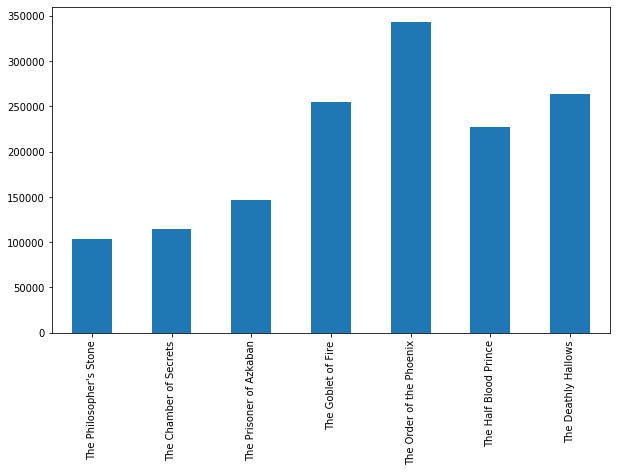

In [26]:
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

pd.Series([len(text) for text in hp_books_nlp], 
          index=harryLabels).plot(kind='bar')

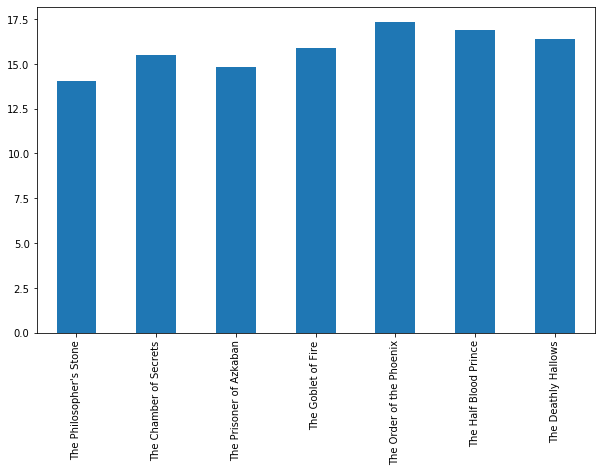

In [27]:
allSents = [list(doc.sents) for doc in hp_books_nlp] 
sentLengths = [[len(sent) for sent in doc] for doc in allSents] 
avgSentLen = [sum(lengths)/len(lengths) for lengths in sentLengths] 
pd.Series(avgSentLen, 
          index=harryLabels).plot(kind='bar')


In [76]:
def prop_adj(doc):
    propns = [w for w in doc if w.pos_ == 'PROPN']
    people = [propn for propn in propns if propn.lower_ not in ['Mrs.','You-','mrs', 'mr.', '', 'house', '.']]
    peopleDict = {person.text: [] for person in people} 
    for propn in people: 
        children = [str(word) for word in list(propn.children) if word.pos_ == 'ADJ']
        for child in children: 
            peopleDict[propn.text].append(children)
    return peopleDict

In [77]:
def cleanNullTerms(d):
    clean = {}
    for k, v in d.items():
        if isinstance(v, dict):
            nested = cleanNullTerms(v)
            if len(nested.keys()) > 0:
                clean[k] = nested
        elif len(v) > 0:
            clean[k] = v
    return clean

In [78]:
import itertools

def mergeValueList(d):
    flat = {}
    for k,v in d.items():
        ab = itertools.chain(*v)
        flat[k] = list(ab)
    return flat

In [79]:
def removeduplicates(d):
    unq = {}
    for k,v in d.items():
        y = list(set(v))
        unq[k] = y
    return unq


In [80]:
pad = [prop_adj(doc) for doc in hp_books_nlp] 
cleanpad = [cleanNullTerms(padone) for padone in pad]
flatpad = [mergeValueList(padone) for padone in cleanpad]
unqpad = [removeduplicates(padone) for padone in flatpad]



In [81]:
from collections import defaultdict

# hp_dict = {*flatpad[0], *flatpad[1], *flatpad[2],*flatpad[3],*flatpad[4],*flatpad[5],**flatpad[6]}
hp_dict = defaultdict(list)

for d in (unqpad[0], unqpad[1],unqpad[2],unqpad[3],unqpad[4],unqpad[5],unqpad[6]): # you can list as many input dicts as you want here
    for key, value in d.items():
        hp_dict[key].append(value)

hp_dict = removeduplicates(mergeValueList(hp_dict))


In [34]:
# Final Harry Potter dictionary, with the character names and the adjectives associated. 
for key in sorted(hp_dict):
    print("%s: %s" % (key, hp_dict[key]))

ANIMAL: ['STUPID']
Abbott: ['unknown', 'poor']
Aberforth: ['deaf']
Act: ['new', 'ridiculous']
Ailments: ['Magical', 'Common']
Albus: ['saintly', 'poor']
Algie: ['Great']
Alley: ['middle']
Americans: ['Native']
Amycus: ['lumpy']
Anglia: ['small', 'old']
Animagi: ['unregistered']
Animagus: ['unregistered']
Anythin: ['unusual']
Apparators: ['unwanted']
Apparition: ['stupid', 'elfish', 'impossible', 'inexpert']
April: ['squally']
Ar: ['bad']
Aragog: ['monstrous']
Archie: ['old']
Argus: ['good']
Ariana: ['mysterious', 'little', 'newborn']
Arrows: ['old']
Arthur: ['high']
Arts: ['Dark']
Atrium: ['great']
August: ['last', '12th', '31st', 'second']
Auror: ['excellent', 'good', 'happy', 'old', 'aged', '-', 'faced', 'famous']
Aurors: ['skilled', 'respected', 'bearded', 'toughest', 'faced']
Azkaban: ['brave']
BLACK: ['QUICK']
BLUDGER: ['ROGUE']
Bagman: ['least']
Bagshot: ['old']
Balls: ['Broken']
Bane: ['bodied']
Barnabas: ['Barmy']
Baron: ['gaunt']
Bars: ['many']
Barty: ['old']
Bathilda: ['real'

In [35]:
# Now lets pick some interesting characters of both genders and analyze their adjectives
# Analysis: 
hp_interesting_keys = ['Harry','Potter','Dumbledore','Hermione','Ginny','Snape','Weasley','Ron']
for key in sorted(hp_dict):
    if (key in hp_interesting_keys):
        print("%s: %s" % (key, hp_dict[key]))

Dumbledore: ['Pleased', 'doin’', 'weak', 'real', 'human', 'dead', 'teenage', 'young', 'last', 'round', 'haired', 'Dear', 'old', 'gentle', 'older', 'good', 'younger', 'alone']
Ginny: ['stupid', 'little', 'Little']
Harry: ['lucky', 'abashed', 'Brilliant', 'dead', 'wonderful', 'suspicious', 'white', 'best', 'tiniest', 'house-', 'little', 'nearest', 'peculiar', 'same', 'immobile', 'Higher', 'Most', 'Dear', 'Quick', 'Deeper', 'eager', 'whole', 'irritated', 'wise', 'MISSING', 'SECRET', 'last', 'invisible', 'miserable', 'determined', 'haired', 'Easy', 'gracious', 'dry', 'up\\', 'ravenous', 'equal', 'opposite', 'real', 'ghostly', 'young', 'poor', 'conspicuous', 'faithful', 'quick', 'true', 'other']
Hermione: ['interested', 'ingenious', 'eyed', 'stern', 'Lucky', 'stupid', 'real', 'SECRET', 'such', 'few', 'gentle', 'Dear', 'distraught', 'unable', 'disgruntled']
Potter: ['523Harry', 'first', '292Harry', '901Harry', '378Harry', '944Harry', 'smart', 'Black', 'elusive', 'Dear', 'good', 'More', 'Path

In [86]:
# Now lets pick some interesting adjectives and see the frequency of those by genders
# Analysis: 
hp_interesting_adjectives = ['small','round','good','angry','daring','faithful','little','wise','stupid','lucky','distraught']
hp_adj_dict = defaultdict(list)
for key in sorted(hp_dict):
    val = hp_dict[key]
    for v in val: 
        if v in hp_interesting_adjectives :
            hp_adj_dict[v].append(key)
hp_adj_dict
# Print the names of the columns. 
print ("{:<10} | {:<10}".format('Adjective', 'Name')) 
print ("--"*50)
# print each data item. 
for key, value in hp_adj_dict.items(): 
    print ("{:<10} {} ".format(key, value))

Adjective  | Name      
----------------------------------------------------------------------------------------------------
small      ['Anglia', 'Dudley', 'E.', 'Fletcher', 'Potter', 'Snitches', 'Won', 'cup', '|'] 
stupid     ['Apparition', 'Ginny', 'Hermione', 'Marietta', 'Ministry', 'Oracle', 'Prince', 'Prophet', 'abou', 'warnin'] 
good       ['Argus', 'Auror', 'Christmas', 'Dumbledore', 'Granger', 'Head', 'Keeper', 'Lord', 'Occlumens', 'Patronus', 'Potter', 'Quidditch', 'Reductor', 'Weasleys', 'Whos', 'eez', 'elf', 'lord'] 
little     ['Ariana', 'Benson', 'Clauses', 'Doge', 'English', 'Felix', 'Ginny', 'Gregorovitch', 'Harry', 'HarryV', 'Jinx', 'Knuts', 'Mudblood', 'Mudbloods', 'Peter', 'Pettigrew', 'Potion', 'Potter', 'Prince', 'Professor', 'Ravenclaws', 'Scorpius', 'Slytherin', 'Squib', 'Timms', 'Weasley', 'berks', 'boy', 'hem', 'inn'] 
round      ['Dumbledore', 'Gringotts'] 
faithful   ['Eater', 'Eaters', 'Harry', 'Quirrell'] 
lucky      ['Evans', 'Harry'] 
daring     ['Gryffin

In [36]:
def prop_verbs(doc):
    propns = [w for w in doc if w.pos_ == 'PROPN']
    people = [propn for propn in propns if propn.lower_ not in ['Mrs.','You-','mrs', 'mr.', '', 'house', '.']]
    peopleDict = {person.text: [] for person in people} 
    for propn in people: 
        children = [str(word) for word in list(propn.children) if word.pos_ == 'VERB']
        for child in children: 
            peopleDict[propn.text].append(children)
    return peopleDict

In [37]:
pav = [prop_verbs(doc) for doc in hp_books_nlp] 
cleanpav = [cleanNullTerms(pavone) for pavone in pav]
flatpav = [mergeValueList(pavone) for pavone in cleanpav]
unqpav = [removeduplicates(pavone) for pavone in flatpav]

In [38]:
from collections import defaultdict

# hp_dict = {*flatpad[0], *flatpad[1], *flatpad[2],*flatpad[3],*flatpad[4],*flatpad[5],**flatpad[6]}
hp_dict_pav = defaultdict(list)

for d in (unqpav[0], unqpav[1],unqpav[2],unqpav[3],unqpav[4],unqpav[5],unqpav[6]): # you can list as many input dicts as you want here
    for key, value in d.items():
        hp_dict_pav[key].append(value)

hp_dict_pav = removeduplicates(mergeValueList(hp_dict_pav))

In [39]:
# Final Harry Potter dictionary, with the character names and the verbs associated. 
# Analysis : 
for key in sorted(hp_dict_pav):
    if (key in hp_interesting_keys):
        print("%s: %s" % (key, hp_dict_pav[key]))

Dumbledore: ['Given', 'thought', 'failed', 'helped', 'swapped', 'insisted', 'found', 'defended', 'guessing', 'looking', 'says', 'riddled', 'gave', 'bent', 'possessed', 'sends', 'reached', 'put', 'looked', 'told', 'turned', 'smiled', 'appointed', 'Forget', 'stood', 'went', 'Trust', 'dared', 'sat', 'twinkling', 'suspected', 'settled', 'moved', 'made', 'paused', 'working', 'need', 'knew', 'forgave', 'know', 'understood', 'unsticking', '’s', 'gleaming', 'sitting', 'sounded', 'smiling', 'gestured', 'standing', 'continued']
Ginny: ['trying', 'choosing', 'crying', 'start', 'squeezed', 'mending', 'flung', 'grinned', 'arrived', 'returning', 'breathing', 'dancing', 'said', 'sitting', 'looked', 'taken', 'hanging', 'lured', 'joined', 'mended', 'whispered', 'huddled', 'sounded', '’s', 'immobilized']
Harry: ['receiving', 'towered', 'flattened', 'become', 'became', 'felt', 'resolved', 'looking', 'believe', 'accompanied', 'wishing', 'raying', 'wandered', 'snatched', 'holding', 'finding', 'hesitated', 

## Get the number of Words by Parts of Speech - Verb, Noun, Proper Noun, Adjective, Adverb .. 

For all the books, get the words by parts of speech and plot them. 
 

In [40]:
def get_stats (doc): 
    stats_dict = {
         'VERB' : 0,
         'NOUN': 0,
         'PROPN': 0,
         'ADV' : 0,
         'ADP': 0,
         'DET' : 0,
         'CCONJ' : 0
        }
    for token in doc:
        if (token.pos_ in stats_dict.keys()): 
            stats_dict[token.pos_] += 1 
    return stats_dict

In [41]:
book_stats = [get_stats(book) for book in hp_books_nlp] 
print(book_stats)

[{'VERB': 14497, 'NOUN': 11500, 'PROPN': 9608, 'ADV': 5497, 'ADP': 7591, 'DET': 9147, 'CCONJ': 2892}, {'VERB': 16251, 'NOUN': 12818, 'PROPN': 11278, 'ADV': 6089, 'ADP': 8974, 'DET': 10093, 'CCONJ': 3144}, {'VERB': 20199, 'NOUN': 15543, 'PROPN': 14894, 'ADV': 7688, 'ADP': 11460, 'DET': 12577, 'CCONJ': 3906}, {'VERB': 34977, 'NOUN': 27615, 'PROPN': 24760, 'ADV': 14104, 'ADP': 20525, 'DET': 22530, 'CCONJ': 7052}, {'VERB': 47963, 'NOUN': 38864, 'PROPN': 29216, 'ADV': 19666, 'ADP': 27458, 'DET': 30620, 'CCONJ': 9321}, {'VERB': 31413, 'NOUN': 23186, 'PROPN': 21519, 'ADV': 12514, 'ADP': 16427, 'DET': 19284, 'CCONJ': 6370}, {'VERB': 36712, 'NOUN': 28915, 'PROPN': 23381, 'ADV': 13039, 'ADP': 19669, 'DET': 24041, 'CCONJ': 8036}]


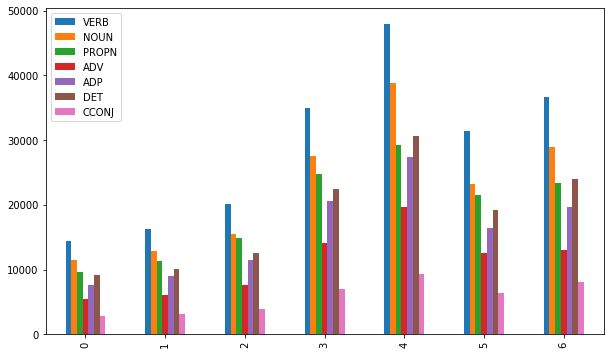

In [42]:
book_stats_df = pd.DataFrame(book_stats)
book_stats_df
book_stats_df.plot.bar()

## Get the number of characters per book, number of quotes per character for each book

In [43]:
import re
def getParaDocs(rawText):
    return [nlp(para) for para in rawText.split('\n\n')]

def findPeople(doc):
    return [ent for ent in doc.ents if ent.label_ == 'PERSON']

def findPeopleInParas(doc):
    return [findPeople(paraDoc) for paraDoc in doc]

def findQuotesInPara(paraDoc,peopleInPara) :
    quotes = re.findall(r'\"(.+?)\"',str(paraDoc))
    quoteDic = {}
    for p in peopleInPara:
        if (str(p) in quoteDic.keys()) :
            quoteDic[str(p)] =  quoteDic[str(p)] + len(quotes)
        else : 
            quoteDic[str(p)] =  len(quotes)
    return quoteDic

def getquotesdic (doc):
    for paraDoc in doc: 
        peopleInPara = findPeople(paraDoc)
        quoteDic = findQuotesInPara(paraDoc,peopleInPara)
    return quoteDic
    

In [44]:
hp_book1Docs = getParaDocs(hp_book1)
hp_book1Peeps = findPeopleInParas(hp_book1Docs)

hp_book2Docs = getParaDocs(hp_book2)
hp_book2Peeps = findPeopleInParas(hp_book2Docs)

hp_book3Docs = getParaDocs(hp_book3)
hp_book3Peeps = findPeopleInParas(hp_book3Docs)

hp_book4Docs = getParaDocs(hp_book4)
hp_book4Peeps = findPeopleInParas(hp_book4Docs)

hp_book5Docs = getParaDocs(hp_book5)
hp_book5Peeps = findPeopleInParas(hp_book5Docs)

hp_book6Docs = getParaDocs(hp_book6)
hp_book6Peeps = findPeopleInParas(hp_book6Docs)

hp_book7Docs = getParaDocs(hp_book7)
hp_book7Peeps = findPeopleInParas(hp_book7Docs)

In [45]:
hp_quote_dic = []
hp_para_docs = [hp_book1Docs,hp_book2Docs,hp_book3Docs,hp_book4Docs,hp_book5Docs,hp_book6Docs,hp_book7Docs]
hp_quote_dic = [getquotesdic(doc) for doc in hp_para_docs] 


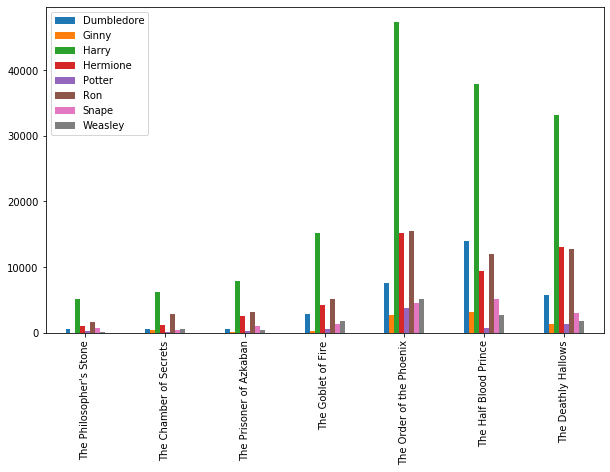

In [46]:
# Number of Quotes by characters and books.  
# Analysis : 
from collections import defaultdict
quotelist = [None] * len(harryLabels)
for idx, val in enumerate(harryLabels):
    book_dic = defaultdict(list)
    for key in sorted(hp_quote_dic[idx]):
        if (key in hp_interesting_keys):
            v = hp_quote_dic[idx][key]
            if key in book_dic:
                book_dic[key].append(v)
            else:
                book_dic[key] = v
        quotelist[idx] = book_dic

quotelist_df = pd.DataFrame(quotelist,index=harryLabels)
quotelist_df.plot.bar()




In [47]:
def entity_df(peeps):
    peepsuniqueList = []
    for letter in peeps:
        str_letter = str(letter)
        if not any(str_letter in n for n in peepsuniqueList):
            if not str_letter[0].islower():
                peepsuniqueList.append(str_letter)
    return peepsuniqueList

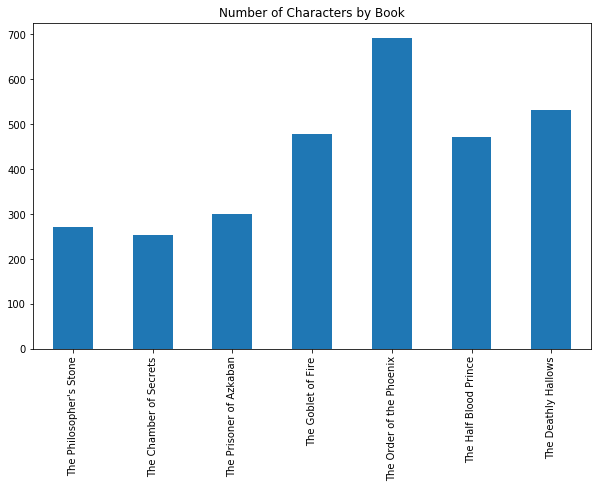

In [48]:
b1 = hp_book1Peeps[0]
b1uniqueList = entity_df(b1)
b2 = hp_book2Peeps[0]
b2uniqueList = entity_df(b2)
b3 = hp_book3Peeps[0]
b3uniqueList = entity_df(b3)
b4 = hp_book4Peeps[0]
b4uniqueList = entity_df(b4)
b5 = hp_book5Peeps[0]
b5uniqueList = entity_df(b5)
b6 = hp_book6Peeps[0]
b6uniqueList = entity_df(b6)
b7 = hp_book7Peeps[0]
b7uniqueList = entity_df(b7)
hp_entity_len = [len(b1uniqueList),len(b2uniqueList),len(b3uniqueList),len(b4uniqueList),len(b5uniqueList),len(b6uniqueList),len(b7uniqueList)]

pd.Series(hp_entity_len,index=harryLabels).plot(kind='bar',title='Number of Characters by Book')


In [49]:
harryTextBlobs= TextBlob(all_hp_books)
harryTextBlobsList=harryTextBlobs.tags


## Additionally, find the Top 20 word types in each of the Harry Potter books. 

Text(0.5, 1.0, 'Harry Potter Books, Top 20 word types used')

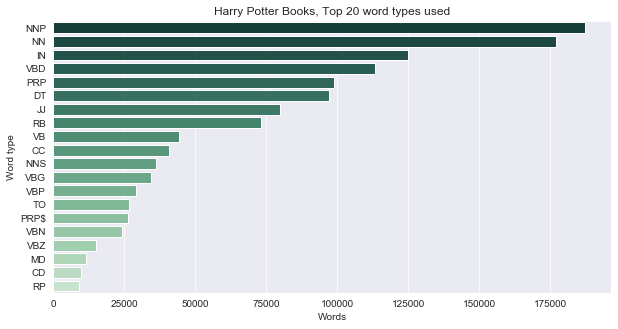

In [50]:
harryPd = pd.DataFrame(harryTextBlobsList)
harryPd.head()
harryPd.columns = ['Words', "Word type"]
harryWordType=harryPd.groupby('Word type').count().reset_index()
harryWordTypeTop20=harryWordType.nlargest(20, 'Words')
harryWordTypeTop20
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Words", y="Word type", palette="ch:2.5,-.2,dark=.2_r", saturation=0.9, data=harryWordTypeTop20).set_title("Harry Potter Books, Top 20 word types used")

## Next, find the number of Proper nouns , which are most frequently use and eliminate the noise. 

In [51]:
def word_analysis(word_list, word_type, how_much, greater_than):
    dict = {'NN': 'nouns', 'VB': 'verbs', 'JJ': 'adjectives', 'WP': 'pronouns', 'RB': 'adverbs', 'NNP': 'proper nouns'}
    filtered_list = [row for row in word_list if str(word_type) in row[1]]
    filtered_list = [ row for row in filtered_list if row[0] not in ['”','’','“','—'] ]
    if greater_than: 
        filtered_list = [row for row in filtered_list if len(row[0]) >= greater_than ]
    df = pd.DataFrame(filtered_list)
    df = df[df[1]==word_type]
    df.columns = ["Word", "Occurences"]
        
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    topwords=y.nlargest(how_much, 'Occurences')
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Word", y="Occurences", palette="ch:3.5,-.2,dark=.2_r", saturation=0.9, data=topwords).set_title("Harry Potter Books, Most frequently used "+ dict.get(word_type))
    return topwords


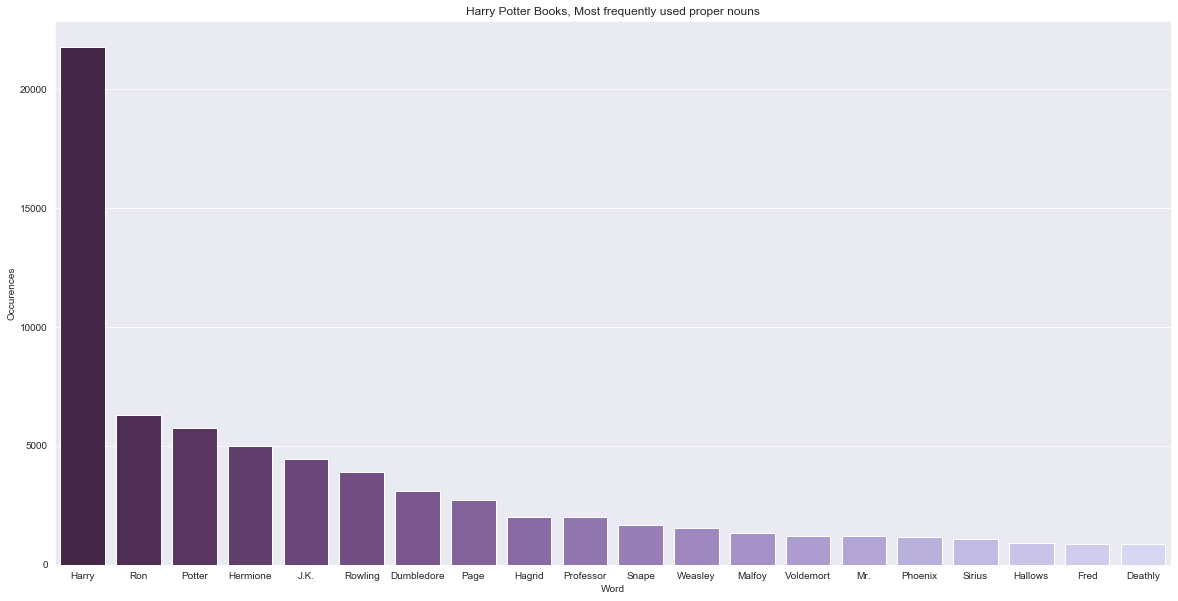

In [52]:
hp_topwords_NNP = word_analysis(harryTextBlobsList, word_type='NNP', how_much=20, greater_than=0)

In [53]:
print(hp_topwords_NNP)

            Word  Occurences
2479       Harry       21770
4594         Ron        6283
4240      Potter        5751
2568    Hermione        4997
2864        J.K.        4434
4620     Rowling        3898
1551  Dumbledore        3107
4019        Page        2733
2437      Hagrid        2013
4300   Professor        2008
5069       Snape        1654
5923     Weasley        1568
3366      Malfoy        1318
5785   Voldemort        1199
3585         Mr.        1198
4147     Phoenix        1153
4990      Sirius        1104
2453     Hallows         917
2048        Fred         894
1325     Deathly         886


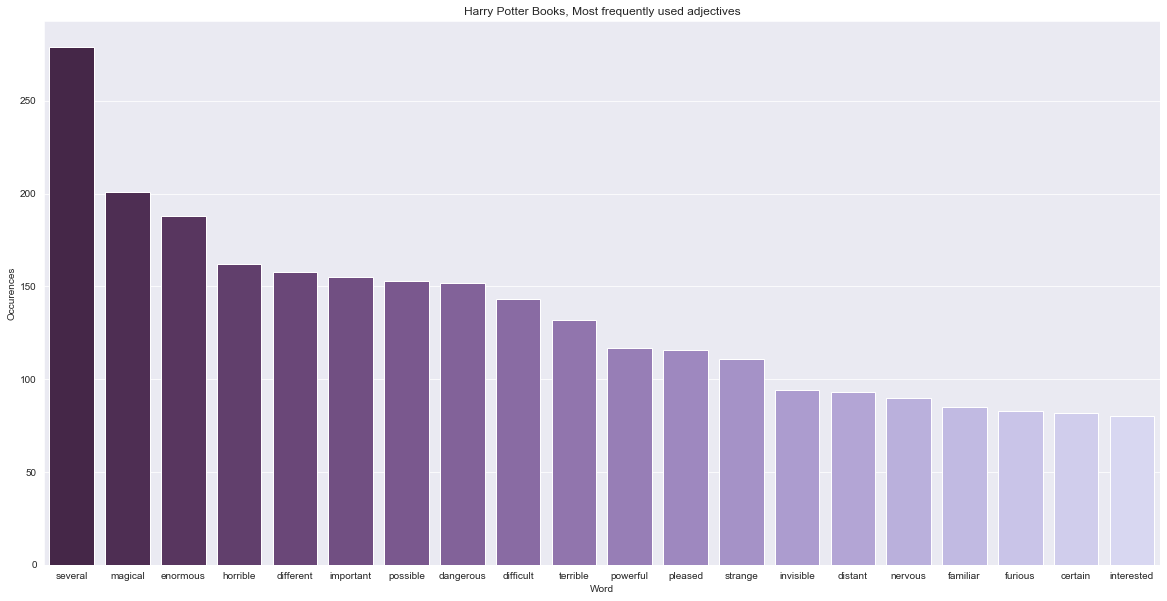

In [54]:
hp_topwords_adj = word_analysis(harryTextBlobsList, word_type='JJ', how_much=20, greater_than=7)

# Topic Modeling 

In [56]:
# Insert your code here. 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

# The add_pipe function appends our functions to the default pipeline.
if not nlp.has_pipe("lemmatizer") :
    nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
if not nlp.has_pipe("stopwords"): 
    nlp.add_pipe(remove_stopwords, name="stopwords", last=True)
    

In [58]:
doc_list = []

# Iterates through each Harry Potter book in the corpus.
for doc in harryPotterBooks:
    # Passes that book through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append(pr)

In [59]:
words = corpora.Dictionary(doc_list)


In [60]:
# Turns each book into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]


In [61]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [62]:
from wordcloud import WordCloud

def draw_wordcloud(doc): 
    plt.figure()
    wordcloud_doc = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(doc)
    plt.imshow(wordcloud_doc, interpolation='bilinear')
    plt.axis("off")
    plt.title('Top 25 Words in Harry Potter Book')
    plt.show

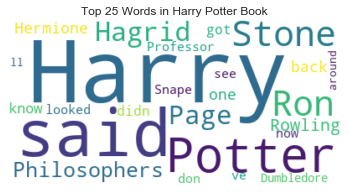

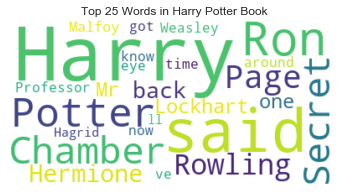

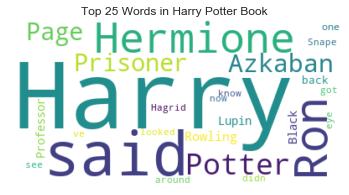

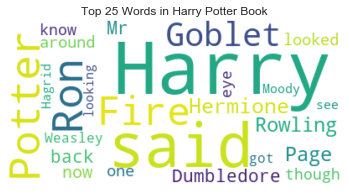

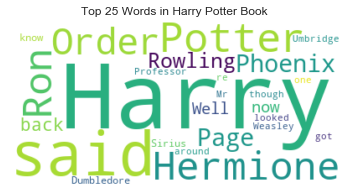

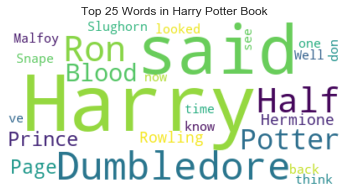

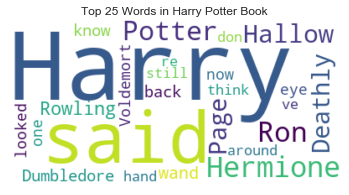

In [63]:

for doc in harryPotterBooks:
    draw_wordcloud(doc) 






In [64]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=10, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [65]:
# Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

# A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

# A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,corpus,words)
vis

/usr/local/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.146757 -0.002604       1        1  44.894352
7      0.165894 -0.028773       2        1  18.805576
0      0.161352 -0.030183       3        1  18.735804
6      0.155686  0.064456       4        1  17.564228
4     -0.075861 -0.005290       5        1   0.000010
8     -0.174922  0.002688       6        1   0.000009
9     -0.058380 -0.006784       7        1   0.000007
3     -0.134162 -0.007109       8        1   0.000005
2     -0.090233  0.002907       9        1   0.000002
5     -0.096130  0.010691      10        1   0.000001, topic_info=     Category          Freq       Term         Total  loglift  logprob
640   Default  21488.000000      Harry  21488.000000  30.0000  30.0000
2879  Default   5729.000000       look   5729.000000  29.0000  29.0000
868   Default   6216.000000        Ron   6216.000000  28.0000  28.0000
833   Default   5780.000000     Potter   5780.000000  27.0000  27.0000
653   Default   5287.000000   Hermione   5287.000000  26.0000  26.0000
...       ...           ...        ...           ...      ...      ...
733   Topic10      0.000004     Malfoy   1291.182251  -1.4019  -7.3920
3590  Topic10      0.000004      right   1644.114868  -1.5598  -7.3083
993   Topic10      0.000004    Weasley   1579.018066  -1.5491  -7.3380
4434  Topic10      0.000004       turn   1563.961670  -1.5448  -7.3433
839   Topic10      0.000004  Professor   1967.583862  -1.8011  -7.3700

[740 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
9626      1  0.012631  Aberforth
9626      2  0.037894  Aberforth
9626      3  0.012631  Aberforth
9626      4  0.934707  Aberforth
9631      1  0.998856   Advanced
...     ...       ...        ...
4727      4  0.134244        yes
4737      1  0.445713          |
4737      2  0.189025          |
4737      3  0.188811          |
4737      4  0.176352          |

[741 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 1, 7, 5, 9, 10, 4, 3, 6])

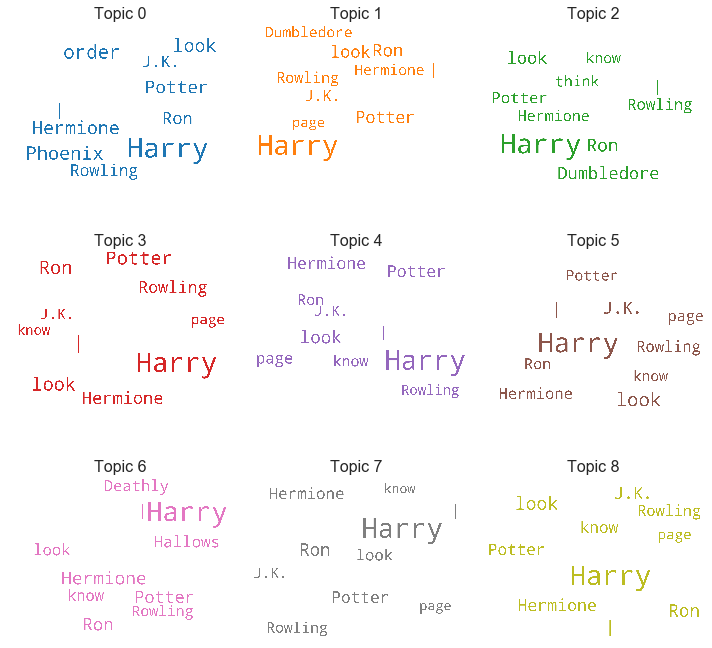

In [66]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [67]:
# Print the Keyword in the 10 topics
# The weights reflect how important a keyword is to that topic.
lda_model.print_topics()

[(0,
  '0.031*"Harry" + 0.013*"order" + 0.012*"Phoenix" + 0.011*"Hermione" + 0.011*"look" + 0.011*"Potter" + 0.010*"Ron" + 0.009*"|" + 0.009*"Rowling" + 0.009*"J.K."'),
 (1,
  '0.044*"Harry" + 0.012*"Ron" + 0.012*"look" + 0.011*"Potter" + 0.009*"Rowling" + 0.009*"|" + 0.009*"J.K." + 0.009*"Hermione" + 0.008*"Dumbledore" + 0.008*"page"'),
 (2,
  '0.008*"Harry" + 0.003*"Ron" + 0.002*"Dumbledore" + 0.002*"look" + 0.002*"Potter" + 0.002*"Rowling" + 0.002*"Hermione" + 0.002*"think" + 0.002*"|" + 0.002*"know"'),
 (3,
  '0.004*"Harry" + 0.002*"Potter" + 0.002*"Ron" + 0.002*"look" + 0.001*"|" + 0.001*"Hermione" + 0.001*"Rowling" + 0.001*"J.K." + 0.001*"page" + 0.001*"know"'),
 (4,
  '0.010*"Harry" + 0.003*"look" + 0.003*"Hermione" + 0.003*"Potter" + 0.002*"page" + 0.002*"Ron" + 0.002*"know" + 0.002*"|" + 0.002*"J.K." + 0.002*"Rowling"'),
 (5,
  '0.007*"Harry" + 0.003*"look" + 0.002*"J.K." + 0.002*"|" + 0.002*"Hermione" + 0.002*"Rowling" + 0.002*"page" + 0.002*"Ron" + 0.002*"Potter" + 0.002*"kn

In [68]:
doc_lda = lda_model[corpus]

In [69]:
# Compute Perplexity
# Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_list, dictionary=words, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.612363057481277

Coherence Score:  -0.07007415284561082


In [70]:
# Insert your code here. 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
lotr_doc_list = []
lotrBooks = [lotr_book1,lotr_book2,lotr_book3]

# Iterates through each Harry Potter book in the corpus.
for doc in lotrBooks:
    # Passes that book through the pipeline and adds to a new list.
    pr = nlp(doc)
    lotr_doc_list.append(pr)

In [72]:
lotr_words = corpora.Dictionary(lotr_doc_list)

# Turns each book into a bag of words.
lotr_corpus = [lotr_words.doc2bow(doc) for doc in lotr_doc_list]

In [73]:
lotr_lda_model = gensim.models.ldamodel.LdaModel(corpus=lotr_corpus,
                                           id2word=lotr_words,
                                           num_topics=10, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [74]:
pyLDAvis.enable_notebook()
lotr_vis = pyLDAvis.gensim.prepare(lotr_lda_model,lotr_corpus,lotr_words)
lotr_vis

/usr/local/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.171496 -0.046218       1        1  39.982121
8      0.187309 -0.007459       2        1  32.779808
6      0.185907  0.051018       3        1  27.237978
0     -0.105050  0.004958       4        1   0.000017
9     -0.095917 -0.001647       5        1   0.000016
5     -0.088367 -0.000611       6        1   0.000015
3     -0.075795 -0.005367       7        1   0.000014
1     -0.078338  0.003805       8        1   0.000014
2     -0.057984 -0.007121       9        1   0.000013
4     -0.043262  0.008643      10        1   0.000012, topic_info=     Category         Freq   Term        Total  loglift  logprob
2     Default  7826.000000         7826.000000  30.0000  30.0000
1897  Default  2762.000000   come  2762.000000  29.0000  29.0000
426   Default  1947.000000  Frodo  1947.000000  28.0000  28.0000
1065  Default  2062.000000      `  2062.000000  27.0000  27.0000
838   Default  1277.000000    Sam  1277.000000  26.0000  26.0000
...       ...          ...    ...          ...      ...      ...
2724  Topic10     0.000021    far   841.983398  -1.5678  -7.0296
3213  Topic10     0.000020   hand   753.228210  -1.5002  -7.0733
5493  Topic10     0.000019  speak   631.181396  -1.3854  -7.1353
5940  Topic10     0.000020   time   797.760376  -1.5760  -7.0916
2708  Topic10     0.000020   fall   779.634094  -1.5671  -7.1058

[761 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.462955          
0         2  0.426337          
0         3  0.112469          
2         1  0.388823          
2         2  0.340779          
...     ...       ...       ...
6617      1  0.807523    wreath
6646      1  0.250673       yes
6646      2  0.596430       yes
6646      3  0.152709       yes
6656      1  0.807810  you_have

[609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 7, 1, 10, 6, 4, 2, 3, 5])

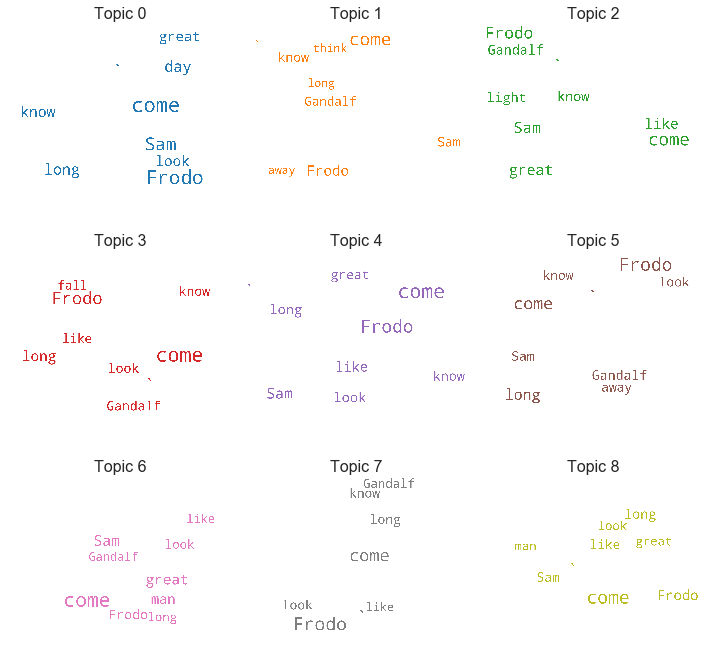

In [75]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lotr_lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()